# Boston Crime Data Visualization and Analysis

Using the csv file of Boston Crime Incident Reports from June 14, 2015 to September 3, 2018 provided by Analysze Boston (which can be found here: https://www.kaggle.com/AnalyzeBoston/crimes-in-boston) I will visually and analysis Crime in Boston.

## Table of Contents
1. Most Common Types of Crime
2. Safest Parts of Boston
3. When is Crime Occuring?

In [1]:
#import needed packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

crime_filepath = 'crime.csv'
crime_data = pd.read_csv(crime_filepath)
crime_data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


## Clean Up Data
In order to utilize the data to its full potenial we must get rid of NaN values.  The **Shooting** column uses these to show the value 'No'.  We will replace all the entries of 'NaN' in **Shooting** with 'N'.

In [2]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [3]:
crime_data = crime_data.fillna('N')
crime_data

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.0603,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,N,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,N,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,N,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,N,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,N,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


## What is the Most Common Type of Crime?

Text(0.5, 0, 'Number of Crimes')

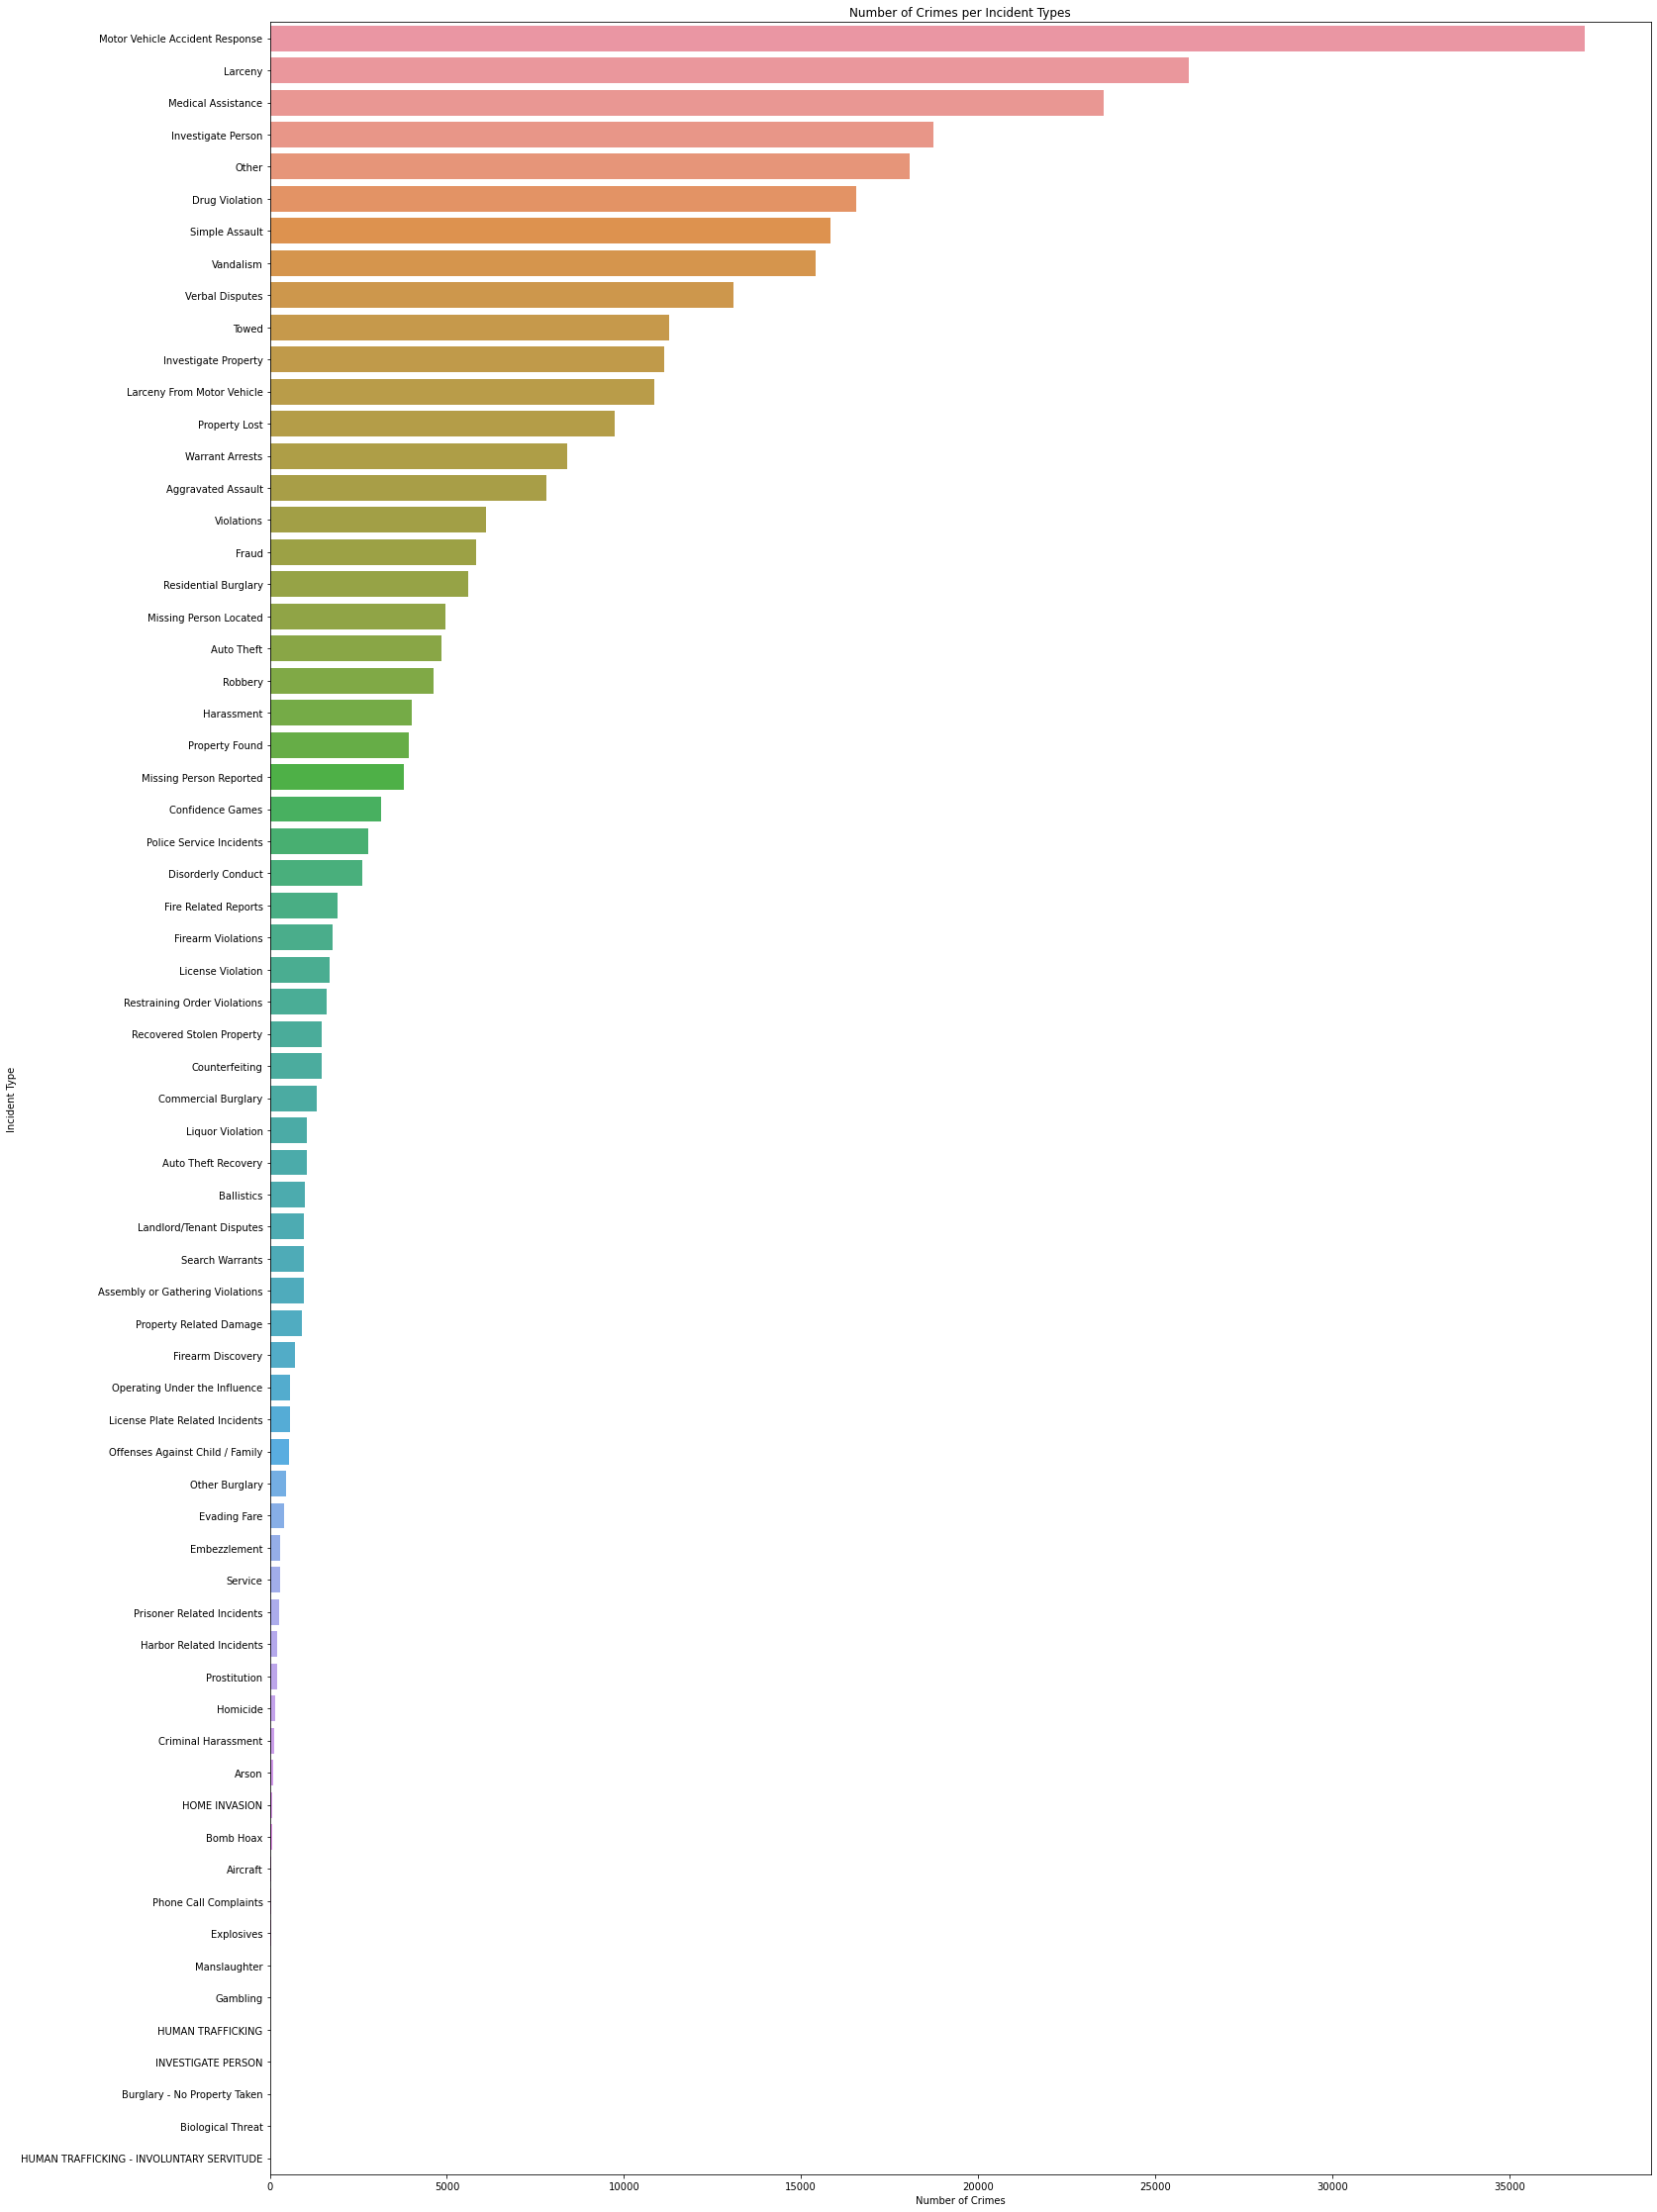

In [4]:
crime_type = crime_data['OFFENSE_CODE_GROUP'].value_counts()
crime_type

# plot bar chart of Number of Crimes per Crime Type
plt.figure(figsize=(25,40))
plt.title('Number of Crimes per Incident Types') 
sns.barplot(x=crime_type, y=crime_type.index)
plt.ylabel('Incident Type')
plt.xlabel('Number of Crimes')

## Safest Parts of Boston

In [5]:
dist_tot = crime_data.groupby('DISTRICT').size()
dist_y= crime_data.groupby('SHOOTING')['DISTRICT'].value_counts()
dist_y = dist_y.to_frame() #multilevel index dataframe
dist_n = dist_y.loc['N']

In [6]:
#get rid of N (Null)
dist_tot = dist_tot.drop(['N'])
dist_tot
dist_n = dist_n.drop(['N'])

In [7]:
dist_n = dist_n.rename(columns = {'DISTRICT':'NUM'})


Text(0.5, 0, 'District')

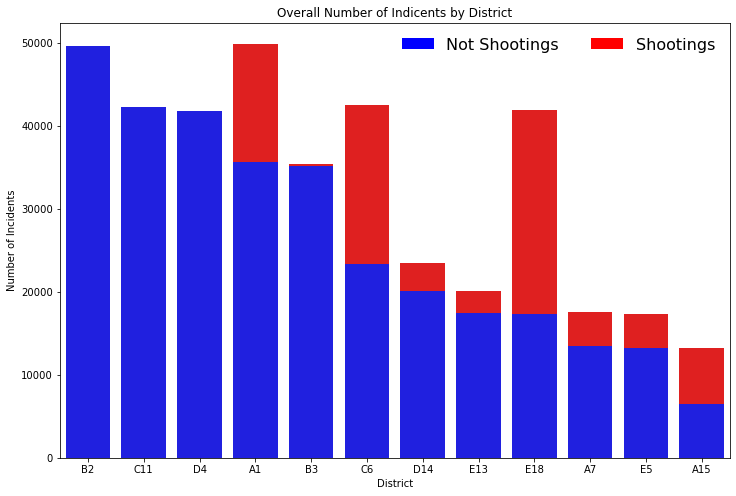

In [8]:
plt.figure(figsize=(12,8))
plt.title("Overall Number of Indicents by District")
# plot total shootings
sns.barplot(x = dist_tot.index, y = dist_tot, color = "red")
dist_n_plot = sns.barplot(x = dist_n.index, y = dist_n.NUM, color = "blue")

#legend code from randyzwitch
topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc="blue",  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Not Shootings', 'Shootings'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

dist_n_plot.set_ylabel("Number of Incidents")
dist_n_plot.set_xlabel("District")


### When is Crime Occuring?

In [34]:
crime_time = crime_data.groupby(['MONTH', 'HOUR']).size().to_frame() #multiindex dataframe
crime_time = crime_time.rename(columns = {0:'NUM'})
crime_time

NUM
MONTH HOUR      
1     0     1077
      1      756
      2      660
      3      358
      4      231
...          ...
12    19    1229
      20    1131
      21    1029
      22     977
      23     791

[288 rows x 1 columns]

In [35]:
crime_time_2 = crime_time.reset_index().pivot(columns='MONTH',index='HOUR',values='NUM')
crime_time_2

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
HOUR,,,,,,,,,,,,
0,1077,993,1098,1156,1211,1465,1704,1680,1224,1308,1084,1106
1,756,674,697,664,675,849,1021,1000,760,798,723,652
2,660,491,530,613,579,736,856,935,625,645,502,521
3,358,301,326,372,336,475,521,507,408,348,306,331
4,231,222,238,284,259,338,360,390,279,273,276,258
5,268,226,270,223,245,340,342,383,296,274,218,226
6,377,373,439,363,387,480,516,513,395,382,364,437
7,665,579,719,647,770,829,859,985,751,720,677,649
8,1039,858,1000,1007,1070,1286,1319,1419,1037,1137,939,932


Text(0.5, 42.0, 'MONTH')

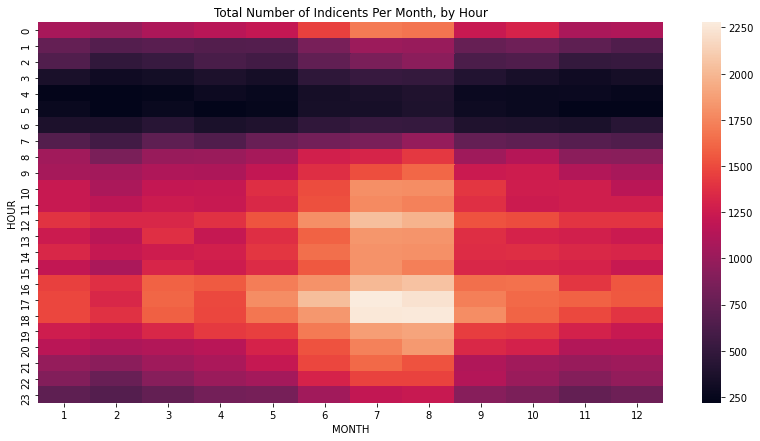

In [39]:
plt.figure(figsize=(14,7))
plt.title("Total Number of Indicents Per Month, by Hour")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=crime_time_2)

# Add label for horizontal axis
plt.xlabel("MONTH")

#### There is a large increase in incidents during July and August!  Summertime Sadness??? 